In [ ]:
# End to End Machine Learning Project Pipeline:

    # 1. Problem Defination
    # 2. Data Collection
    # 3. Data Ingestion
    # 4. Data Cleaning and Preprocessing
    # 5. Exploratory Data Analysis (EDA)
    # 6. Feature Engineering
    # 7. Extract Input and Output column as well as Train Test Split
    # 8. Model Selection
    # 9. Model Training
    # 10. Model Evaluation
    # 11. Hyperparameter Tuning
    # 12. Model Validation
    # 13. Model Deployment
    # 14. Monitoring and Maintenance

In [24]:
# Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Import Datset
Data=pd.read_csv('placement.csv')

In [16]:
# Check size of the dataset
Data.shape

(100, 4)

In [17]:
# Show the structure of the dataset
Data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [18]:
# Check data type of the column
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [19]:
# Check data have any null value
Data.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [20]:
# Check Data have any duplicated value
Data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [21]:
# Summary of basic statistics
Data.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [22]:
# Remove the unnecessary column
Data=Data.iloc[:,1:]
Data.shape

(100, 3)

In [ ]:
# Agian check the dataset
Data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


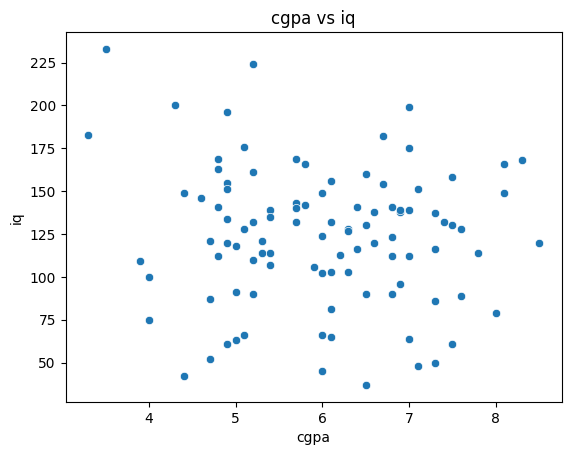

In [29]:
# Now perform EDA
# Show the correlation between iq and cgpa Column
plt.Figure(figsize=(4,4))
sns.scatterplot(data=Data, x='cgpa', y='iq')
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('cgpa vs iq')
plt.show()

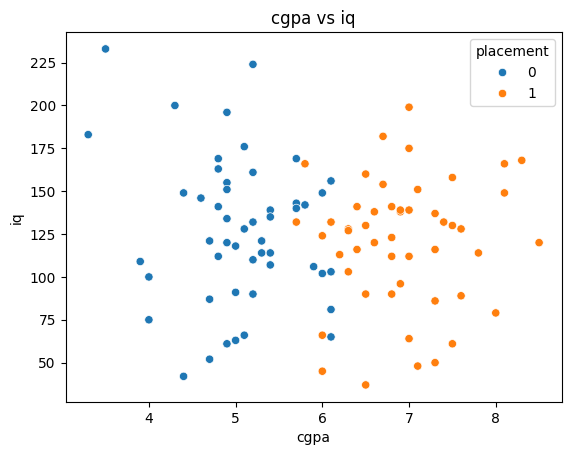

In [32]:
# Show the correlation between iq and cgpa and placement Column
plt.Figure(figsize=(1,1))
sns.scatterplot(data=Data, x='cgpa', y='iq', hue='placement')
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('cgpa vs iq')
plt.show()

In [ ]:
# Here, we do not need to perform feature selection.
# Both feature is importent to perform ML

In [ ]:
# Extract input and output column
X=Data.iloc[:, 0:2]
y=Data.iloc[:, -1]

In [36]:
# Show the input column
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [37]:
# Show the output column
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [73]:
# Now split the train test data
# Import required libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)          # Provide input, output and test_size

In [77]:
# Show X_train and X_test
X_train
X_train.shape
X_test.shape


(10, 2)

In [78]:
# Show y_trian and y_test
y_train
y_train.shape
y_test.shape

(10,)

In [79]:
# Scale the input column 
from sklearn.preprocessing import StandardScaler
# Create an object of StandardScalar
scaler=StandardScaler()

In [ ]:
# Scale the X_train
X_train=scaler.fit_transform(X_train)    # Learn mean & std of each column and transform it


In [81]:
# Scale the X_test
X_test=scaler.transform(X_test)
X_test

array([[-0.89449495, -0.78113739],
       [ 1.96747858,  1.06116778],
       [ 1.41354822,  0.86465523],
       [-1.91003395, -0.33898415],
       [-1.07913841,  1.13485999],
       [-0.7098515 , -0.31442008],
       [ 1.50586994,  0.12773316],
       [ 0.95193958,  0.39793792],
       [ 1.96747858,  0.64357861],
       [-1.17146013, -0.87939367]])

In [ ]:
# Now train the model
# As input and ouput feature contain linear relationhip 
# It is classification problem so use Logisticregression
# Import libraries
from sklearn.linear_model import LogisticRegression
# Create objest
clf=LogisticRegression()

In [ ]:
# sklearn = package
# model_selection = module
# train_test_split = function
# LogisticRegression = class


In [ ]:

# A package is a folder that contains multiple module and subpackages
    # sklearn/
    # │── model_selection.py
    # │── preprocessing.py
    # │── metrics.py
# A module is a Python file that contains functions, classes, and variables used to organize code.
    # Module = toolbox
# A function is a reusable block of code that performs a specific task and executes when called.
    # Function = tool inside the toolbox
# A clas is a blueprint for creating objects 
    # LogisticRegression()

In [85]:
# Model training
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [89]:
# Now Evaluation of training model
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [94]:
# Find the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

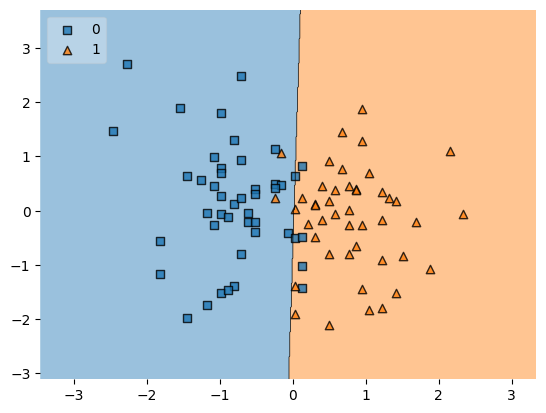

In [93]:
# Show the decision boundary 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [96]:
# Now save the ML model
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))